In [101]:
import sklearn
import pandas as pd
import numpy as np

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [103]:
odesa = pd.read_csv('reg15_odesa.csv')

In [104]:
odesa.head(5)

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,datetime_combined,date,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_vinnytsia,alarm_in_kropyvnytskyi,alarm_in_mykolaiv
0,61223,9.0,1.0,5.2,0.8,74.0,0.0,0.0,0.0,27.4,...,2022-02-24 00:00:00,2022-02-24,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,61224,9.0,1.0,5.2,0.8,74.0,0.0,0.0,0.0,27.4,...,2022-02-24 01:00:00,2022-02-24,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,61225,9.0,1.0,5.2,0.8,74.0,0.0,0.0,0.0,27.4,...,2022-02-24 02:00:00,2022-02-24,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61226,9.0,1.0,5.2,0.8,74.0,0.0,0.0,0.0,27.4,...,2022-02-24 03:00:00,2022-02-24,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61227,9.0,1.0,5.2,0.8,74.0,0.0,0.0,0.0,27.4,...,2022-02-24 04:00:00,2022-02-24,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
odesa.dtypes

Unnamed: 0                  int64
day_tempmax               float64
day_tempmin               float64
day_temp                  float64
day_dew                   float64
day_humidity              float64
day_precip                float64
day_precipcover           float64
day_snow                  float64
day_windgust              float64
day_windspeed             float64
day_winddir               float64
day_pressure              float64
day_cloudcover            float64
day_visibility            float64
day_solarradiation        float64
day_solarenergy           float64
day_uvindex               float64
day_moonphase             float64
hour_temp                 float64
hour_humidity             float64
hour_dew                  float64
hour_precip               float64
hour_precipprob           float64
hour_snow                 float64
hour_snowdepth            float64
hour_windgust             float64
hour_windspeed            float64
hour_winddir              float64
hour_pressure 

## features used

In [106]:
features = odesa[['day_tempmax', 'day_tempmin', 'day_temp', 'day_dew',
       'day_humidity', 'day_precip', 'day_precipcover', 'day_snow',
       'day_windgust', 'day_windspeed', 'day_winddir', 'day_pressure',
       'day_cloudcover', 'day_visibility', 'day_solarradiation',
       'day_solarenergy', 'day_uvindex', 'day_moonphase', 'hour_temp',
       'hour_humidity', 'hour_dew', 'hour_precip', 'hour_precipprob',
       'hour_snow', 'hour_snowdepth', 'hour_windgust', 'hour_windspeed',
       'hour_winddir', 'hour_pressure', 'hour_visibility', 'hour_cloudcover',
       'hour_solarradiation', 'hour_uvindex', 'hour_severerisk', 'region_id_x', 
        'time', 'day_of_week',
       'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours',
       'alarm_in_vinnytsia', 'alarm_in_kropyvnytskyi', 'alarm_in_mykolaiv']]

## training model

In [107]:
target = odesa['alarm']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)


## accuracy

In [108]:
print('Accuracy:', accuracy)

Accuracy: 0.920075519194462


## statistics

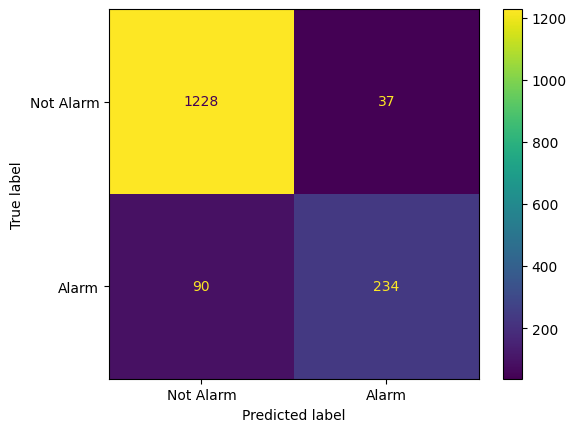

In [109]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Alarm', 'Alarm'])
disp.plot()


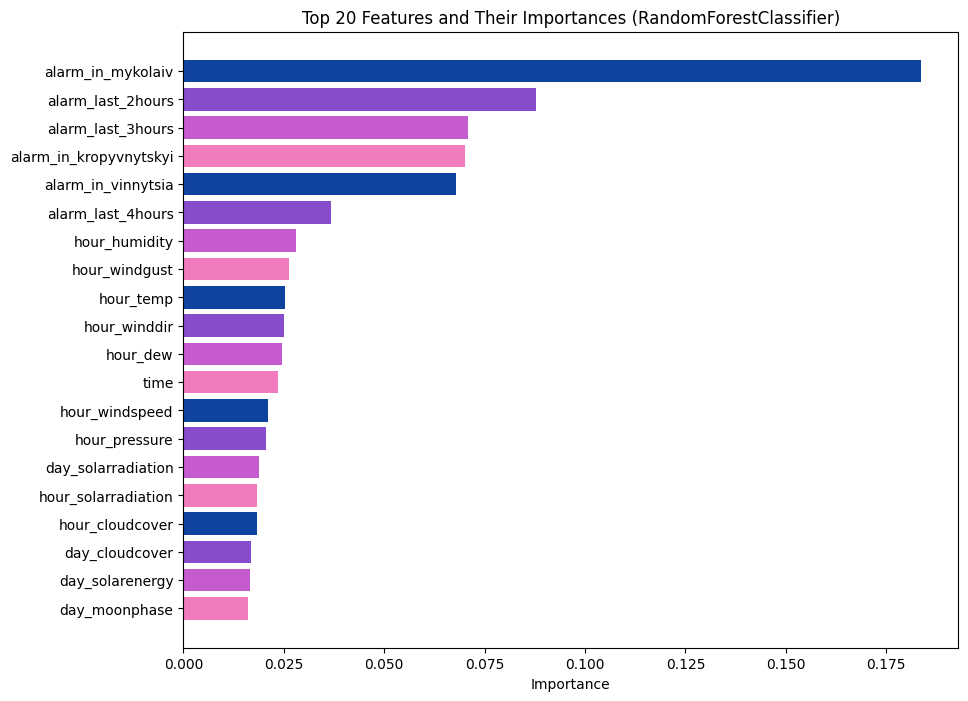

In [110]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = x_train.columns[indices][:20]
colors = ['#10439F', '#874CCC', '#C65BCF', '#F27BBD']

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_features)), importances[indices][:20], align='center', color=colors)
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Importance')
plt.title(f'Top 20 Features and Their Importances ({"RandomForestClassifier"})')
plt.gca().invert_yaxis()
plt.show()



In [111]:
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[1228   37]
 [  90  234]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1265
         1.0       0.86      0.72      0.79       324

    accuracy                           0.92      1589
   macro avg       0.90      0.85      0.87      1589
weighted avg       0.92      0.92      0.92      1589

